In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from model import encoder, decoder
from tqdm import tqdm

In [4]:
class Debug:
    pass

debug = Debug()

In [5]:
inputs = tf.placeholder(tf.float32, (None, 32, 32, 1))

In [6]:
x = (inputs / 255.0) * 2 - 1

In [7]:
z = encoder(x)

In [8]:
y = decoder(z)

In [9]:
loss = tf.reduce_mean(tf.pow(x - y, 2))

In [10]:
optimize = tf.train.AdamOptimizer().minimize(loss)

In [24]:
# data load

import numpy as np
data = np.load('data/cat_32.npy')

test_size = 100
data_test = data[-test_size:]
data = data[:-test_size]

# data = (data / 255.0) * 2 - 1
# data = data[:1024]

In [25]:
data.shape

(123102, 32, 32, 1)

In [26]:
init = tf.global_variables_initializer()
sess = tf.Session()

In [27]:
sess.run(init)

In [28]:
batch_size = 128
max_epoch = 20

saver = tf.train.Saver()

for epoch in range(max_epoch):
    for index in tqdm(range(0, len(data), batch_size)):
        batch = data[index:index+batch_size]
        _, current_loss = sess.run([optimize, loss], {inputs: batch})
    saver.save(sess, './model/model', global_step=epoch)    
    print("epoch:", epoch+1, ", loss:", current_loss)
    
    


  0%|          | 1/962 [00:00<01:44,  9.16it/s]

epoch: 1 , loss: 0.092403755


  0%|          | 1/962 [00:00<01:45,  9.09it/s]

epoch: 2 , loss: 0.05904777


  0%|          | 1/962 [00:00<01:44,  9.16it/s]

epoch: 3 , loss: 0.044125207


  0%|          | 1/962 [00:00<01:45,  9.08it/s]

epoch: 4 , loss: 0.03681755


  0%|          | 1/962 [00:00<01:46,  9.06it/s]

epoch: 5 , loss: 0.03251621


  0%|          | 1/962 [00:00<01:44,  9.20it/s]

epoch: 6 , loss: 0.028289065


  0%|          | 1/962 [00:00<01:46,  9.06it/s]

epoch: 7 , loss: 0.026115622


  0%|          | 1/962 [00:00<01:45,  9.07it/s]

epoch: 8 , loss: 0.02467152


  0%|          | 1/962 [00:00<01:45,  9.15it/s]

epoch: 9 , loss: 0.022054926


  0%|          | 1/962 [00:00<01:50,  8.66it/s]

epoch: 10 , loss: 0.021034768


  0%|          | 1/962 [00:00<01:44,  9.16it/s]

epoch: 11 , loss: 0.0198988


  0%|          | 1/962 [00:00<01:45,  9.09it/s]

epoch: 12 , loss: 0.018512942


  0%|          | 1/962 [00:00<01:50,  8.70it/s]

epoch: 13 , loss: 0.018028244


  0%|          | 1/962 [00:00<01:45,  9.13it/s]

epoch: 14 , loss: 0.017681628


  0%|          | 1/962 [00:00<01:44,  9.21it/s]

epoch: 15 , loss: 0.017128166


  0%|          | 1/962 [00:00<01:44,  9.16it/s]

epoch: 16 , loss: 0.017364105


  0%|          | 1/962 [00:00<01:44,  9.20it/s]

epoch: 17 , loss: 0.016355481


  0%|          | 1/962 [00:00<01:45,  9.07it/s]

epoch: 18 , loss: 0.01599617


  0%|          | 1/962 [00:00<01:45,  9.13it/s]

epoch: 19 , loss: 0.015251545


100%|██████████| 962/962 [01:45<00:00,  9.13it/s]


epoch: 20 , loss: 0.014718977


In [29]:
image = data[0]

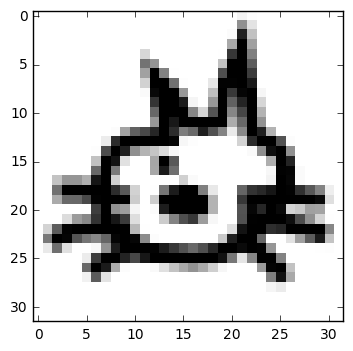

In [30]:
plt.imshow(image[:, :, 0], cmap='gray', interpolation='nearest')

In [31]:
decoded = sess.run(y, {inputs: [image]})

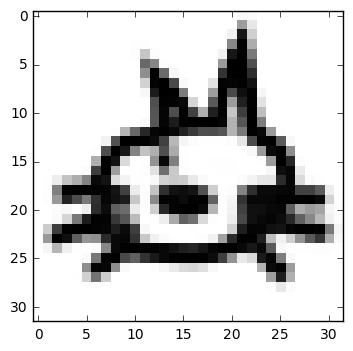

In [32]:
plt.imshow(decoded[0, :, :].mean(-1), cmap='gray', interpolation='nearest')

In [39]:
image = data_test[3]

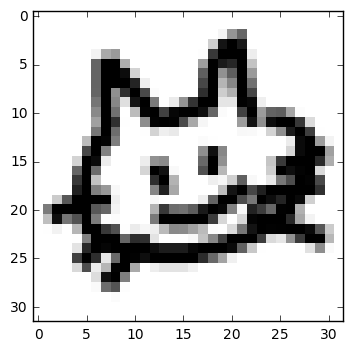

In [40]:
plt.imshow(image[:, :, 0], cmap='gray', interpolation='nearest')

In [41]:
decoded = sess.run(y, {inputs: [image]})

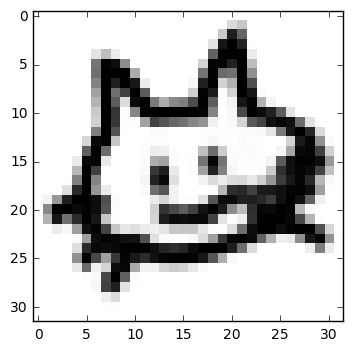

In [42]:
plt.imshow(decoded[0, :, :].mean(-1), cmap='gray', interpolation='nearest')